In [23]:
print('a')

a


## data cleaning

In [3]:
import pandas as pd

In [7]:
df = pd.read_csv('data.csv')
df

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,800130,911516,1,t,closed,1,DPW - Refuse,Blue Bin Containers,475156,2024-12-18T09:15:00,...,NaN,Pittsburgh,Crawford-Roberts,4.200303e+10,7.0,2.0,2.0,40.446514,-79.986889,APPROXIMATE
799996,800131,911512,1,f,open,0,"Permits, Licenses and Inspections",Construction Site Maintenance,33740,2024-12-18T09:10:00,...,NaN,Pittsburgh,North Oakland,4.200398e+10,8.0,4.0,4.0,40.446724,-79.952455,APPROXIMATE
799997,800132,911523,1,t,closed,1,DPW - Refuse,Missed Recycling Pick Up,506,2024-12-18T09:28:00,...,NaN,Pittsburgh,Bloomfield,4.200308e+10,7.0,8.0,5.0,40.459190,-79.944703,APPROXIMATE
799998,800133,911522,1,f,in progress,3,DPW - Refuse,Blue Bin Containers,475156,2024-12-18T09:27:00,...,NaN,Pittsburgh,Bloomfield,4.200308e+10,7.0,8.0,5.0,40.459346,-79.945525,APPROXIMATE


In [8]:
duplicate_groups = df['group_id'][df['group_id'].duplicated()]
print(duplicate_groups.nunique())
print(duplicate_groups.value_counts())
df[df['num_requests'] > 1]['group_id'].value_counts()

0
Series([], Name: count, dtype: int64)


group_id
820673    1
342963    1
430927    1
44413     1
464553    1
         ..
489829    1
522762    1
652880    1
246840    1
911320    1
Name: count, Length: 20089, dtype: int64

In [9]:
df_snow = df[df['request_type_name'].str.contains('Snow/Ice Removal', case=False, na=False)]
df_snow

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
423,424,604051,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-02T11:30:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
463,464,694389,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-11-17T08:30:00,...,0.0,Pittsburgh,NaN,4.200302e+10,6.0,NaN,NaN,40.446432,-79.999620,EXACT
1430,1431,606017,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-07T09:53:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
1877,1878,811542,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-01-18T07:37:00,...,0.0,Pittsburgh,NaN,4.200316e+10,3.0,NaN,NaN,40.432962,-79.973672,EXACT
1994,1995,596039,1,f,open,0,DPW - Street Maintenance,Snow/Ice removal,494,2022-01-18T09:48:00,...,0.0,Pittsburgh,Summer Hill,4.200326e+10,1.0,26.0,1.0,40.483512,-80.003578,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798831,798944,910318,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T11:03:00,...,0.0,Pittsburgh,Spring Hill-City View,NaN,1.0,24.0,1.0,40.461905,-79.994188,EXACT
798844,798957,910353,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T12:40:00,...,901.0,Pittsburgh,Stanton Heights,NaN,9.0,10.0,5.0,40.478321,-79.948883,EXACT
798849,798962,910344,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T12:13:00,...,0.0,Pittsburgh,Lincoln-Lemington-Belmar,NaN,9.0,12.0,5.0,40.467644,-79.900226,EXACT
799337,799472,910872,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-16T10:39:00,...,0.0,Pittsburgh,Knoxville,NaN,3.0,30.0,3.0,40.418368,-79.990098,EXACT


In [10]:
df_snow_unique = df_snow.sort_values(by='create_date_et').drop_duplicates(subset='group_id', keep='first')
df_snow_unique

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
558891,558892,1421,1,t,closed,1,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2015-04-22T09:40:00,...,0.0,Pittsburgh,Strip District,4.200302e+10,7.0,2.0,2.0,40.454688,-79.983240,EXACT
525977,525978,2055,1,t,closed,1,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2015-04-27T09:31:00,...,1.0,Pittsburgh,South Side Flats,4.200317e+10,3.0,17.0,3.0,40.429360,-79.988616,EXACT
246978,246979,3322,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2015-05-04T16:09:00,...,0.0,Pittsburgh,Bon Air,4.200356e+10,4.0,18.0,3.0,40.406761,-79.997123,EXACT
591555,591556,4269,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2015-05-11T10:19:00,...,717.0,Pittsburgh,Beechview,4.200319e+10,4.0,19.0,6.0,40.405763,-80.029487,EXACT
507059,507060,4702,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2015-05-13T11:05:00,...,911.0,Pittsburgh,North Oakland,4.200356e+10,8.0,4.0,4.0,40.451679,-79.952698,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798830,798943,910324,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T11:11:00,...,0.0,Pittsburgh,Sheraden,NaN,2.0,20.0,6.0,40.456206,-80.063879,EXACT
798849,798962,910344,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T12:13:00,...,0.0,Pittsburgh,Lincoln-Lemington-Belmar,NaN,9.0,12.0,5.0,40.467644,-79.900226,EXACT
798844,798957,910353,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-13T12:40:00,...,901.0,Pittsburgh,Stanton Heights,NaN,9.0,10.0,5.0,40.478321,-79.948883,EXACT
799337,799472,910872,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-12-16T10:39:00,...,0.0,Pittsburgh,Knoxville,NaN,3.0,30.0,3.0,40.418368,-79.990098,EXACT


In [11]:
df_snow_unique['create_date_et'] = pd.to_datetime(df['create_date_et'])
df_daily = df_snow_unique.groupby(df_snow_unique['create_date_et'].dt.date).size().reset_index(name='num_requests')


df_daily['date'] = pd.to_datetime(df_daily['create_date_et'])
df_daily.set_index('date', inplace=True)
ts = df_daily['num_requests'].asfreq('D')

In [12]:
ts = df_daily['num_requests'].asfreq('D').fillna(0)

In [13]:
ts

date
2015-04-22     1.0
2015-04-23     0.0
2015-04-24     0.0
2015-04-25     0.0
2015-04-26     0.0
              ... 
2024-12-12    38.0
2024-12-13    49.0
2024-12-14     0.0
2024-12-15     0.0
2024-12-16     2.0
Freq: D, Name: num_requests, Length: 3527, dtype: float64

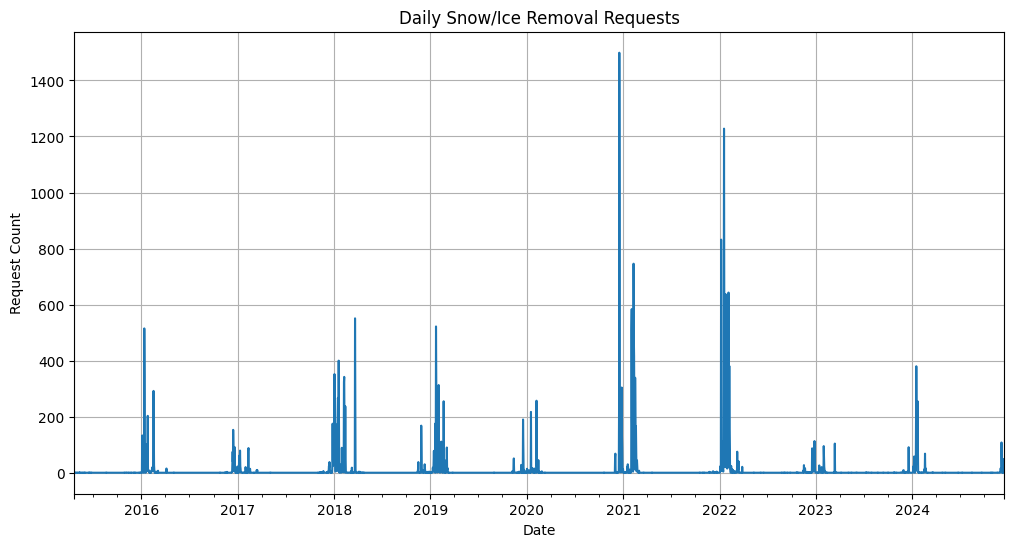

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ts.plot(title='Daily Snow/Ice Removal Requests')
plt.xlabel('Date')
plt.ylabel('Request Count')
plt.grid()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -9.058546357086135
p-value: 4.6299429439050515e-15


In [21]:
ts_diff = ts.diff().dropna()

In [23]:
result = adfuller(ts_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -15.618693451351797
p-value: 1.742899269237026e-28


In [24]:
ts_full_diff = ts.diff().diff(365).dropna()

In [25]:
result = adfuller(ts_full_diff)
print(f'新 p-value: {result[1]}')

新 p-value: 9.403608640528231e-29


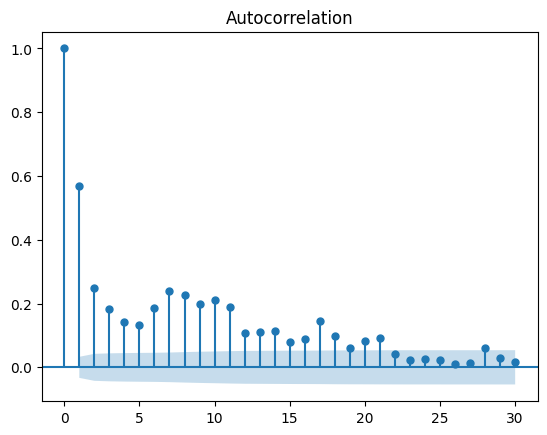

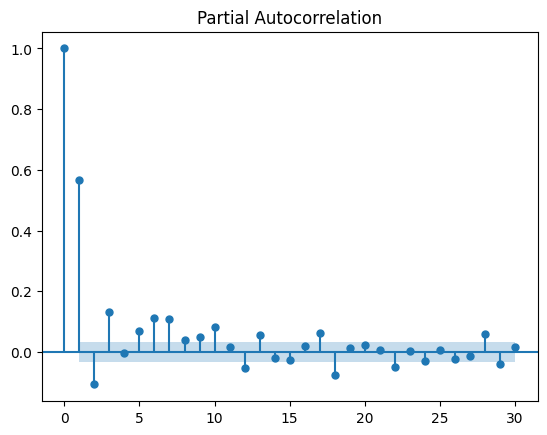

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts, lags=30)
plot_pacf(ts, lags=30)
plt.show()


In [2]:
from pmdarima import auto_arima

# 自动选择最优(p,d,q)(P,D,Q)s参数
model = auto_arima(
    ts,
    seasonal=True,
    m=365,  # 周季节性
    trace=True,
    suppress_warnings=True,
    stepwise=True,
   # exogenous=df[['snow_depth']]
)
print(model.summary())

ImportError: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'OpenSSL 1.1.0h  27 Mar 2018'. See: https://github.com/urllib3/urllib3/issues/2168

In [16]:
ts_monthly = ts.resample('ME').sum()
ts_monthly

date
2015-04-30      2.0
2015-05-31      5.0
2015-06-30      4.0
2015-07-31      0.0
2015-08-31      1.0
              ...  
2024-08-31      1.0
2024-09-30      1.0
2024-10-31      1.0
2024-11-30      7.0
2024-12-31    286.0
Freq: ME, Name: num_requests, Length: 117, dtype: float64

In [17]:
df_snow = pd.read_csv('Snowfalldata.csv')
df_snow

,Year,Jan,Feb,Mar,Apr,May,Oct,Nov,Dec,Total
0,2015,18.5,15.4,9.0,0.3,0.0,0.1,0.1,0.3,43.7
1,2016,14.6,9.5,2.1,3.1,0.1,0.0,2.1,6.0,37.5
2,2017,7.5,6.7,9.7,0.1,0.0,0.0,0.1,13.3,37.4
3,2018,17.2,9.7,12.3,7.3,0.0,0.1,3.6,2.0,52.2
4,2019,12.9,12.9,5.2,0.1,0.0,0.1,3.0,4.6,38.8
5,2020,4.9,8.8,1.0,0.1,0.1,0.0,0.8,27.5,43.2
6,2021,12.0,16.1,0.1,2.4,0.0,0.0,1.5,0.7,32.8
7,2022,19.2,5.8,17.1,0.9,0.0,0.0,3.3,2.9,49.2
8,2023,8.1,0.2,3.1,0.1,0.1,0.1,0.6,1.1,13.4
9,2024,9.9,4.2,0.5,0.1,0.0,0.1,0.8,5.7,21.3


In [19]:
snow_data = {
    2015: [18.5, 15.4, 9, 0.3, 0, 0, 0, 0, 0.1, 0.1, 0.3],
    2016: [14.6, 9.5, 2.1, 3.1, 0.1, 0, 0, 0, 0, 2.1, 6, 0],
    2017: [7.5, 6.7, 9.7, 0.1, 0, 0, 0, 0, 0.1, 0.1, 13.3, 0],
    2018: [17.2, 9.7, 12.3, 7.3, 0.1, 0, 0, 0, 3.6, 2, 0, 0],
    2019: [12.9, 12.9, 5.2, 0.1, 0, 0, 0, 0, 0.1, 3, 4.6, 0],
    2020: [4.9, 8.8, 0.1, 0.1, 0.1, 0, 0, 0, 0.1, 0.8, 27.5, 0],
    2021: [12, 16.1, 0.1, 2.4, 0, 0, 0, 0, 0, 1.5, 0.7, 0],
    2022: [19.2, 5.8, 17.1, 0.9, 0, 0, 0, 0, 0, 3.3, 2.9, 0],
    2023: [8.1, 0.2, 3.1, 0.1, 0, 0, 0, 0, 0.1, 0.6, 1.1, 0],
    2024: [9.9, 4.2, 0.5, 0.1, 0, 0, 0, 0, 0.1, 0.8, 5.7, 0],
}

# 构造雪量时间序列 DataFrame
snowfall_records = []
for year, values in snow_data.items():
    for month, snow in enumerate(values, start=1):
        date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(0)
        snowfall_records.append((date, snow))

df_snow = pd.DataFrame(snowfall_records, columns=['date', 'snowfall']).set_index('date')

# 对齐 ts_monthly 与 df_snow
df_all = pd.concat([ts_monthly.rename("num_requests"), df_snow], axis=1).dropna()
df_all

,num_requests,snowfall
date,,
2015-04-30,2.0,0.3
2015-05-31,5.0,0.0
2015-06-30,4.0,0.0
2015-07-31,0.0,0.0
2015-08-31,1.0,0.0
...,...,...
2024-08-31,1.0,0.0
2024-09-30,1.0,0.1
2024-10-31,1.0,0.8


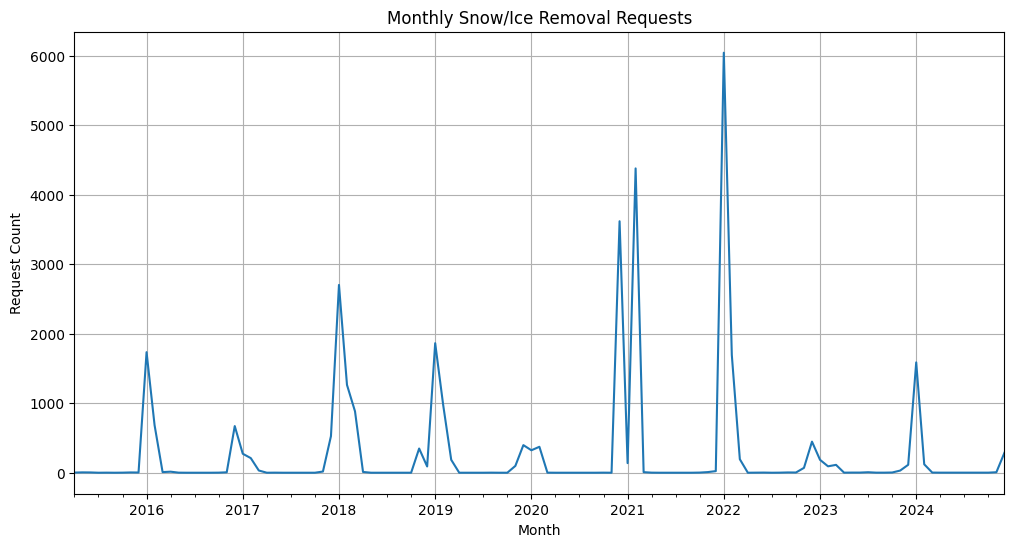

In [20]:
plt.figure(figsize=(12, 6))
ts_monthly.plot(title='Monthly Snow/Ice Removal Requests')
plt.xlabel('Month')
plt.ylabel('Request Count')
plt.grid()
plt.show()

## SARIMA

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_monthly)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6226417782733003
p-value: 0.08840737981506619


In [18]:
ts_monthly_diff = ts_monthly.diff().dropna()

In [19]:
ts_monthly_diff

date
2015-05-31      3.0
2015-06-30     -1.0
2015-07-31     -4.0
2015-08-31      1.0
2015-09-30     -1.0
              ...  
2024-08-31      0.0
2024-09-30      0.0
2024-10-31      0.0
2024-11-30      6.0
2024-12-31    279.0
Freq: ME, Name: num_requests, Length: 116, dtype: float64

<Axes: title={'center': 'Monthly Snow/Ice Removal Requests'}, xlabel='date'>

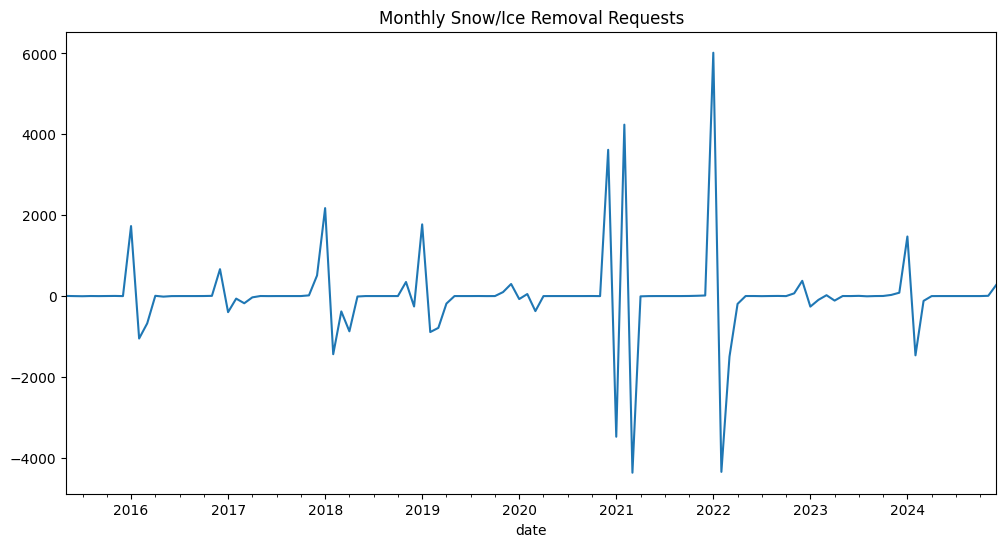

In [20]:
plt.figure(figsize=(12, 6))
ts_monthly_diff.plot(title='Monthly Snow/Ice Removal Requests')

In [21]:
result = adfuller(ts_monthly_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.845122810151448
p-value: 1.7507635687294415e-09


In [48]:
ts_monthly_full_diff = ts_monthly.diff().diff(12).dropna()

In [49]:
result = adfuller(ts_monthly_full_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.398879205500055
p-value: 0.000298191261201701


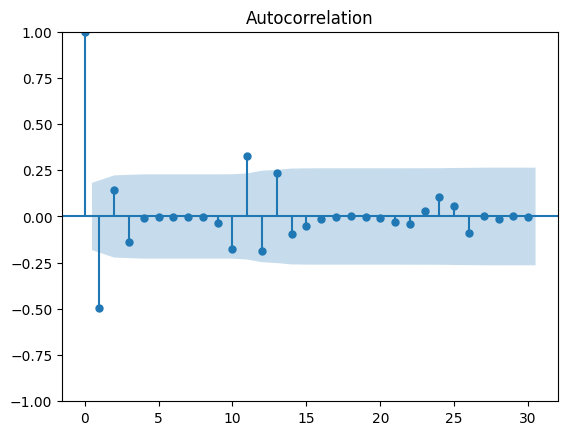

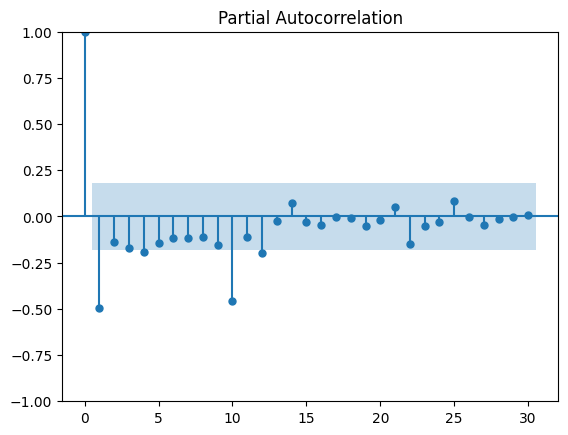

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_monthly_diff, lags=30)
plot_pacf(ts_monthly_diff, lags=30)
plt.show()

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 最佳参数通常为(1,1,1)(1,1,1,12)
model = SARIMAX(
    ts_monthly_diff,
    order=(1,1,1),          # (p,d,q)
    seasonal_order=(1,1,1,12),  # (P,D,Q,m)
    enforce_stationarity=True
)
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       num_requests   No. Observations:                  116
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -848.769
Date:                            Wed, 16 Apr 2025   AIC                           1707.539
Time:                                    07:53:46   BIC                           1720.713
Sample:                                05-31-2015   HQIC                          1712.875
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6267      0.038    -16.559      0.000      -0.701      -0.552
ma.L1         -1.0000     23.026   

In [21]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings


warnings.simplefilter('ignore', ConvergenceWarning)
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
seasonal_period = 12

# 所有参数组合
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [seasonal_period]))

# 网格搜索结果保存列表
results_custom = []

# 开始尝试不同组合
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = SARIMAX(ts_monthly,
                          order=param,
                          seasonal_order=seasonal_param,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            res = mod.fit(disp=False)
            results_custom.append((param, seasonal_param, res.aic))
        except:
            continue

# 转为 DataFrame 查看结果
results_df_custom = pd.DataFrame(results_custom, columns=['order', 'seasonal_order', 'AIC'])
results_df_custom = results_df_custom.sort_values(by='AIC').reset_index(drop=True)


results_df_custom.head()

,order,seasonal_order,AIC
0,"(0, 2, 2)","(1, 1, 1, 12)",1451.909666
1,"(0, 2, 2)","(0, 1, 1, 12)",1453.028592
2,"(1, 2, 2)","(1, 1, 1, 12)",1453.335629
3,"(0, 1, 2)","(1, 1, 1, 12)",1461.591000
4,"(2, 1, 2)","(1, 1, 1, 12)",1461.680346


In [22]:
model = SARIMAX(ts_monthly,
                order=(0, 2, 2),
                seasonal_order=(0, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         num_requests   No. Observations:                  117
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -722.514
Date:                              Sat, 19 Apr 2025   AIC                           1453.029
Time:                                      07:24:17   BIC                           1462.938
Sample:                                  04-30-2015   HQIC                          1457.021
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.0358      0.731     -2.785      0.005      -3.468      -0.603
ma.L2          1.03

## Evaluating 

In [23]:

# 拆分训练集与测试集（比如最后 12 个月为测试集）
train = ts_monthly.iloc[:-12]
test = ts_monthly.iloc[-12:]
train_original = ts_monthly.iloc[1:-12]  # 注意索引对齐
test_original = ts_monthly.iloc[-12:]

In [24]:
model = SARIMAX(train,
                order=(0, 2, 2),
                seasonal_order=(0, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

In [25]:
model_2 = SARIMAX(train,
                order=(0, 2, 2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results_2 = model_2.fit()

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

forecast = results_2.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
predicted_mean = predicted_mean.clip(lower=0)

rmse = np.sqrt(mean_squared_error(test, predicted_mean))
mae = mean_absolute_error(test, predicted_mean)
mape = mean_absolute_percentage_error(test, predicted_mean)

print(f" RMSE: {rmse:.2f}")
print(f" MAE: {mae:.2f}")
print(f" MAPE: {mape:.2%}")

 RMSE: 365.49
 MAE: 151.61
 MAPE: 529.07%


In [29]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# import numpy as np
#
# forecast = results_2.get_forecast(steps=12)
# predicted_mean = forecast.predicted_mean
#
# last_train_value = train_original.iloc[-1]  # 训练集最后一个原始值
# pred_original = last_train_value + predicted_mean.cumsum()
# conf_int_diff = forecast.conf_int()
# conf_int_original = last_train_value + conf_int_diff.cumsum()
#
# rmse = np.sqrt(mean_squared_error(test_original, pred_original))
# mae = mean_absolute_error(test_original, pred_original)
# mape = mean_absolute_percentage_error(test_original, pred_original)
#
# print(f" RMSE: {rmse:.2f}")
# print(f" MAE: {mae:.2f}")
# print(f" MAPE: {mape:.2%}")

In [36]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# import numpy as np
#
# forecast = results.get_forecast(steps=12)
# predicted_mean = forecast.predicted_mean
#
# rmse = np.sqrt(mean_squared_error(test, predicted_mean))
# mae = mean_absolute_error(test, predicted_mean)
# mape = mean_absolute_percentage_error(test, predicted_mean)
#
# print(f" RMSE: {rmse:.2f}")
# print(f" MAE: {mae:.2f}")
# print(f" MAPE: {mape:.2%}")


In [34]:


predicted_mean

2024-01-31    1407.420775
2024-02-29    1012.090008
2024-03-31      74.470737
2024-04-30       0.000000
2024-05-31       0.000000
2024-06-30       0.000000
2024-07-31       0.000000
2024-08-31       0.000000
2024-09-30       0.000000
2024-10-31       0.000000
2024-11-30       0.000000
2024-12-31     437.505443
Freq: ME, Name: predicted_mean, dtype: float64

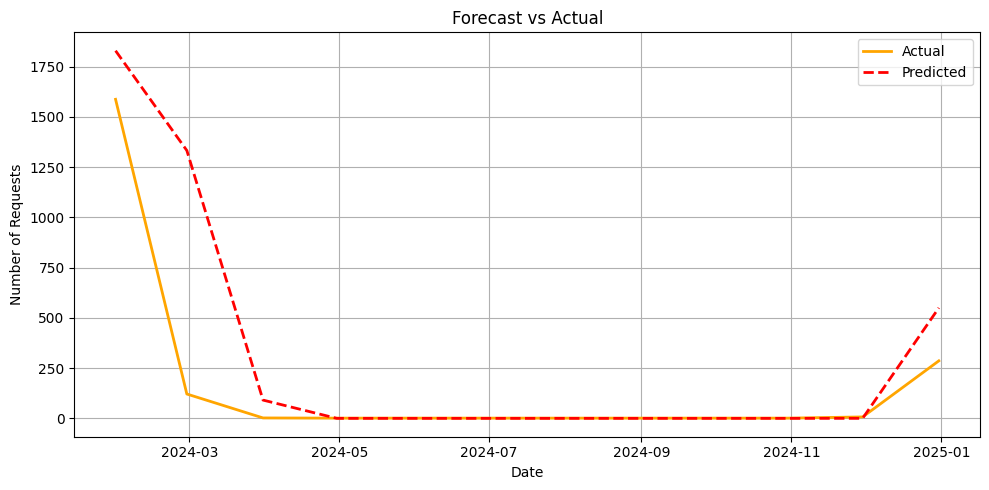

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual', color='orange', linewidth=2)
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
predicted_mean

2024-01-31    1828.708491
2024-02-29    1332.263359
2024-03-31      90.808322
2024-04-30       0.000000
2024-05-31       0.000000
2024-06-30       0.000000
2024-07-31       0.000000
2024-08-31       0.000000
2024-09-30       0.000000
2024-10-31       0.000000
2024-11-30       0.000000
2024-12-31     549.567800
Freq: ME, Name: predicted_mean, dtype: float64

In [41]:
from sklearn.metrics import r2_score

r2 = r2_score(test, predicted_mean)
print(f"R-squared (R²): {r2:.4f}")

R-squared (R²): 0.2964


## forecast

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 使用整个数据集训练模型
model = SARIMAX(ts_monthly,
                order=(0, 2, 2),                     # 你调参得出的最优参数
                seasonal_order=(1, 1, 1, 12),        # 年季节性，m=12
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()


In [44]:
forecast_future = results.get_forecast(steps=16)
forecast_mean = forecast_future.predicted_mean
forecast_mean = forecast_mean.clip(lower=0)
conf_int = forecast_future.conf_int()  # 置信区间（上下限）


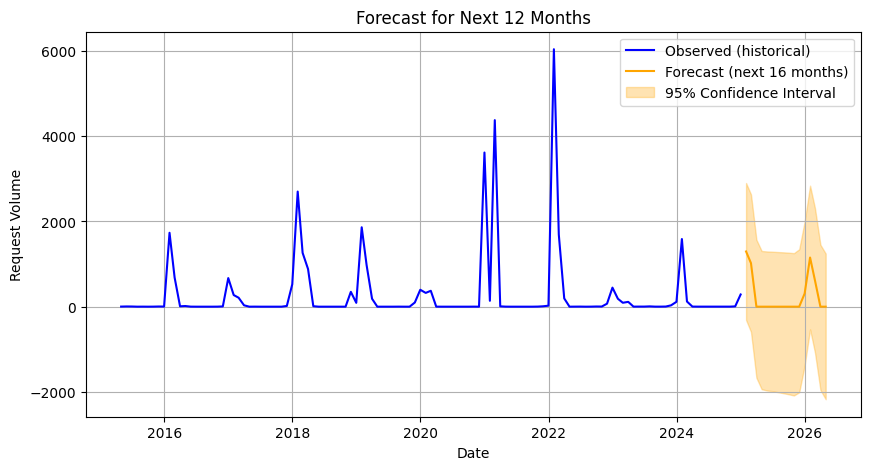

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ts_monthly, label='Observed (historical)', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast (next 16 months)', color='orange')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Request Volume")
plt.grid(True)
plt.show()


In [46]:
df_rf = ts.to_frame().reset_index()
df_rf.columns = ['date', 'num_requests']
df_rf

,date,num_requests
0,2015-04-22,1.0
1,2015-04-23,0.0
2,2015-04-24,0.0
3,2015-04-25,0.0
4,2015-04-26,0.0
...,...,...
3522,2024-12-12,38.0
3523,2024-12-13,49.0
3524,2024-12-14,0.0
3525,2024-12-15,0.0


In [47]:
df_rf['dayofweek'] = df_rf['date'].dt.dayofweek
df_rf['month'] = df_rf['date'].dt.month
df_rf['dayofyear'] = df_rf['date'].dt.dayofyear
df_rf['is_weekend'] = df_rf['dayofweek'].isin([5, 6]).astype(int)
df_rf['is_winter'] = df_rf['month'].isin([12, 1, 2]).astype(int)
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter
0,2015-04-22,1.0,2,4,112,0,0
1,2015-04-23,0.0,3,4,113,0,0
2,2015-04-24,0.0,4,4,114,0,0
3,2015-04-25,0.0,5,4,115,1,0
4,2015-04-26,0.0,6,4,116,1,0
...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1
3523,2024-12-13,49.0,4,12,348,0,1
3524,2024-12-14,0.0,5,12,349,1,1
3525,2024-12-15,0.0,6,12,350,1,1


In [48]:
df_rf['lag_1'] = df_rf['num_requests'].shift(1)
df_rf['lag_7'] = df_rf['num_requests'].shift(7)
df_rf['lag_365'] = df_rf['num_requests'].shift(365)

In [49]:
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
0,2015-04-22,1.0,2,4,112,0,0,NaN,NaN,NaN
1,2015-04-23,0.0,3,4,113,0,0,1.0,NaN,NaN
2,2015-04-24,0.0,4,4,114,0,0,0.0,NaN,NaN
3,2015-04-25,0.0,5,4,115,1,0,0.0,NaN,NaN
4,2015-04-26,0.0,6,4,116,1,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1,2.0,108.0,2.0
3523,2024-12-13,49.0,4,12,348,0,1,38.0,48.0,4.0
3524,2024-12-14,0.0,5,12,349,1,1,49.0,0.0,1.0
3525,2024-12-15,0.0,6,12,350,1,1,0.0,0.0,0.0


In [50]:
df_rf.dropna(inplace=True)

In [51]:
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
365,2016-04-21,0.0,3,4,112,0,0,0.0,0.0,1.0
366,2016-04-22,0.0,4,4,113,0,0,0.0,0.0,0.0
367,2016-04-23,0.0,5,4,114,1,0,0.0,0.0,0.0
368,2016-04-24,0.0,6,4,115,1,0,0.0,0.0,0.0
369,2016-04-25,0.0,0,4,116,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1,2.0,108.0,2.0
3523,2024-12-13,49.0,4,12,348,0,1,38.0,48.0,4.0
3524,2024-12-14,0.0,5,12,349,1,1,49.0,0.0,1.0
3525,2024-12-15,0.0,6,12,350,1,1,0.0,0.0,0.0


In [122]:
df_rf_onehot = pd.get_dummies(df_rf, columns=['month', 'dayofweek', 'is_winter'], prefix=['month', 'dow', 'winter'])


In [123]:
df_rf_onehot

,date,num_requests,dayofyear,is_weekend,lag_1,lag_7,lag_365,month_1,month_2,month_3,...,month_12,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,winter_0,winter_1
365,2016-04-21,0.0,112,0,0.0,0.0,1.0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
366,2016-04-22,0.0,113,0,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
367,2016-04-23,0.0,114,1,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,True,False,True,False
368,2016-04-24,0.0,115,1,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
369,2016-04-25,0.0,116,0,0.0,0.0,0.0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,347,0,2.0,108.0,2.0,False,False,False,...,True,False,False,False,True,False,False,False,False,True
3523,2024-12-13,49.0,348,0,38.0,48.0,4.0,False,False,False,...,True,False,False,False,False,True,False,False,False,True
3524,2024-12-14,0.0,349,1,49.0,0.0,1.0,False,False,False,...,True,False,False,False,False,False,True,False,False,True
3525,2024-12-15,0.0,350,1,0.0,0.0,0.0,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# X 特征和 y 标签
X = df_rf.drop(columns=['num_requests','date'])
#X = df_rf[['dayofweek', 'month', 'dayofyear', 'is_weekend', 'is_winter', 'lag_1', 'lag_7', 'lag_365']]
y = df_rf['num_requests']

# 切分训练集和测试集（按时间顺序）
split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# 训练模型
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,            # 控制过拟合
    min_samples_leaf=5,     # 防止对极端值敏感
    random_state=42
)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 评估
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 4.24, RMSE: 20.19


D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'sMAPE': smape(y_test, y_pred)
}
print(pd.DataFrame(metrics, index=['Daily RF']))

               MAE       RMSE       sMAPE
Daily RF  4.237541  20.186924  187.989556


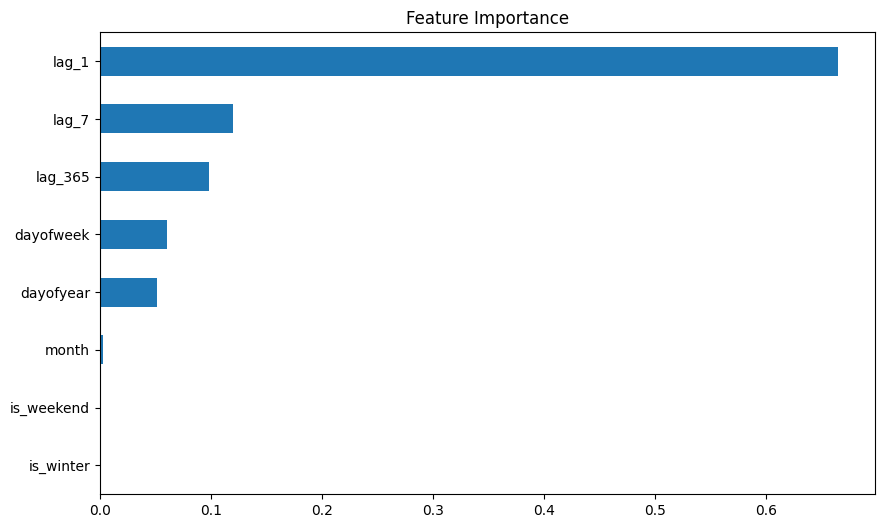

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pd.Series(rf.feature_importances_, index=X.columns) \
  .sort_values() \
  .plot(kind='barh')
plt.title('Feature Importance')
plt.show()

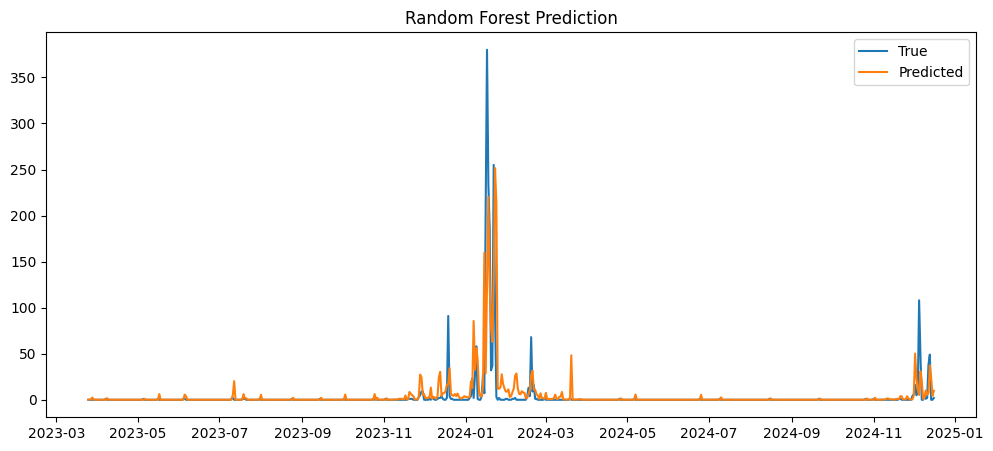

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_rf['date'].iloc[split_idx:], y_test.values, label='True')
plt.plot(df_rf['date'].iloc[split_idx:], y_pred, label='Predicted')
plt.title('Random Forest Prediction')
plt.legend()
plt.show()


In [56]:
# 使用最近7天的真实值作为特征
last_date = y.index[-1]
next_7days = pd.date_range(start=last_date, periods=7, freq='D')
features = pd.DataFrame({
    'lag_1': [y.iloc[-1]]*7,
    'lag_2': [y.iloc[-2]]*7,
    # ...其他特征...
}, index=next_7days)

# 一次性预测（非迭代）
pred_7days = rf.predict(features)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- lag_2
Feature names seen at fit time, yet now missing:
- dayofweek
- dayofyear
- is_weekend
- is_winter
- lag_365
- ...


In [58]:
# 1. 生成未来日期
future_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=7)

# 2. 创建空df
# future_df = pd.DataFrame(index=future_dates)
# future_df['dayofweek'] = future_df.index.dayofweek
# future_df['dayofyear'] = future_df.index.dayofyear
# future_df['month'] = future_df.index.month
# future_df['is_weekend'] = future_df['dayofweek'] >= 5
# future_df['is_winter'] = future_df['month'].isin([11,12,1])
# for lag in [1, 7, 365]:
#     future_df[f'lag_{lag}'] = ts.shift(lag).reindex(future_df.index)
# future_df


In [59]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 假设当前数据最后日期为2023-12-31


# 构建未来7天的特征数据框
future_df = pd.DataFrame(index=future_dates)

# 添加时间特征
future_df['dayofweek'] = future_df.index.dayofweek  # 周一=0, 周日=6
future_df['month'] = future_df.index.month
future_df['dayofyear'] = future_df.index.dayofyear
future_df['is_weekend'] = (future_df['dayofweek'] >= 5).astype(int)
future_df['is_winter'] = future_df['month'].isin([12, 1, 2]).astype(int)  # 冬季月份



In [60]:
future_df

,dayofweek,month,dayofyear,is_weekend,is_winter
2024-12-17,1,12,352,0,1
2024-12-18,2,12,353,0,1
2024-12-19,3,12,354,0,1
2024-12-20,4,12,355,0,1
2024-12-21,5,12,356,1,1
2024-12-22,6,12,357,1,1
2024-12-23,0,12,358,0,1


In [61]:
# 添加滞后特征（需动态更新）
last_known_value = df_rf.iloc[-1]['num_requests']  # 最后已知值
last_week_value = df_rf.iloc[-7]['num_requests']   # 7天前的值
last_year_value = df_rf.iloc[-365]['num_requests']   # 去年同期值

future_df['lag_1'] = last_known_value  # 初始化为最后已知值
future_df['lag_7'] = last_week_value
future_df['lag_365'] = last_year_value

In [62]:
future_df

,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
2024-12-17,1,12,352,0,1,2.0,1.0,2.0
2024-12-18,2,12,353,0,1,2.0,1.0,2.0
2024-12-19,3,12,354,0,1,2.0,1.0,2.0
2024-12-20,4,12,355,0,1,2.0,1.0,2.0
2024-12-21,5,12,356,1,1,2.0,1.0,2.0
2024-12-22,6,12,357,1,1,2.0,1.0,2.0
2024-12-23,0,12,358,0,1,2.0,1.0,2.0


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# X 特征和 y 标签
X = df_rf.drop(columns=['num_requests','date'])
#X = df_rf[['dayofweek', 'month', 'dayofyear', 'is_weekend', 'is_winter', 'lag_1', 'lag_7', 'lag_365']]
y = df_rf['num_requests']


# 训练模型
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,            # 控制过拟合
    min_samples_leaf=5,     # 防止对极端值敏感
    random_state=42
)
rf_full.fit(X, y)



RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=200,
                      random_state=42)

In [64]:
predictions = []

# 迭代预测（每天预测后更新滞后特征）
for i in range(7):
    # 提取当天的特征
    day_features = future_df.iloc[[i]]

    # 预测当天的值
    pred = rf_full.predict(day_features)[0]
    predictions.append(pred)

    # 更新未来日期的滞后特征
    if i < 6:  # 不需要更新最后一天
        future_df.loc[future_df.index[i+1], 'lag_1'] = pred  # 更新下一天的lag_1

        # 如果是第7天，更新下个周期的lag_7
        if i == 6:
            next_week_idx = i + 7 - len(future_df)  # 循环到下一周
            if next_week_idx < len(future_df):
                future_df.loc[future_df.index[next_week_idx], 'lag_7'] = pred

# 将预测结果添加到future_df
future_df['predicted_requests'] = predictions

In [65]:
print(future_df[['predicted_requests']])

            predicted_requests
2024-12-17           39.657033
2024-12-18           33.387611
2024-12-19           23.471128
2024-12-20           17.949127
2024-12-21           30.732922
2024-12-22           19.390430
2024-12-23          112.180562


D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35831 (\N{CJK UNIFIED IDEOGRAPH-8BF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\IPython\core\pylabtools.py:170:

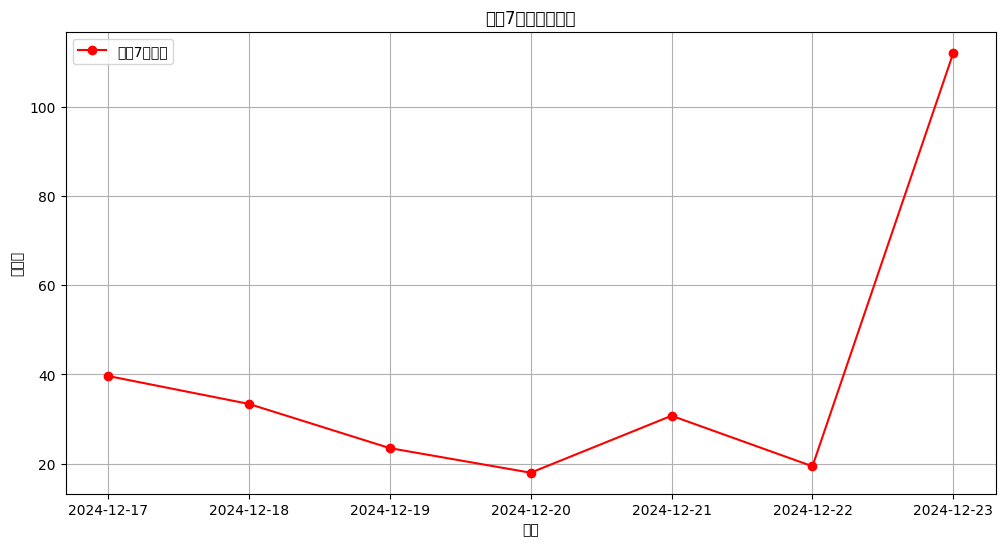

In [66]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# plt.plot(df_rf.index[-30:], df_rf['num_requests'][-30:], label='历史数据')
plt.plot(future_df.index, future_df['predicted_requests'], 'ro-', label='未来7天预测')
plt.title('未来7天请求量预测')
plt.xlabel('日期')
plt.ylabel('请求量')
plt.legend()
plt.grid()
plt.show()

In [67]:

df_prophet = ts.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet 要求列名为 ds（时间） 和 y（目标）
df_prophet

,ds,y
0,2015-04-22,1.0
1,2015-04-23,0.0
2,2015-04-24,0.0
3,2015-04-25,0.0
4,2015-04-26,0.0
...,...,...
3522,2024-12-12,38.0
3523,2024-12-13,49.0
3524,2024-12-14,0.0
3525,2024-12-15,0.0


In [68]:
df_prophet

,ds,y
0,2015-04-22,1.0
1,2015-04-23,0.0
2,2015-04-24,0.0
3,2015-04-25,0.0
4,2015-04-26,0.0
...,...,...
3522,2024-12-12,38.0
3523,2024-12-13,49.0
3524,2024-12-14,0.0
3525,2024-12-15,0.0


In [69]:
from prophet import Prophet

D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [70]:
# 拆分最后 30 天为测试
from prophet import Prophet
train_df = df_prophet.iloc[:-300]
test_df = df_prophet.iloc[-300:]

model_prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet.add_country_holidays(country_name='US')
model_prophet.fit(train_df)

future = model_prophet.make_future_dataframe(periods=300, freq='D')
forecast = model_prophet.predict(future)

# 预测值 vs 实际值

forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-300:]['yhat'].values
y_true = test_df['y'].values

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")


07:39:24 - cmdstanpy - INFO - Chain [1] start processing
07:39:26 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 7.24, MAE: 2.56, MAPE: nan%


D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LvFeinong\AppData\Local\Temp\ipykernel_24892\150622451.py:28: RuntimeWarning: divide by zero encountered in divide
  mape = (abs((y_true - y_pred) / y_true).mean()) * 100
C:\Users\LvFeinong\AppData\Local\Temp\ipykernel_24892\150622451.py:28: RuntimeWarning: invalid value encountered in divide
  mape = (abs((y_true - y_pred) / y_true).mean()) * 100


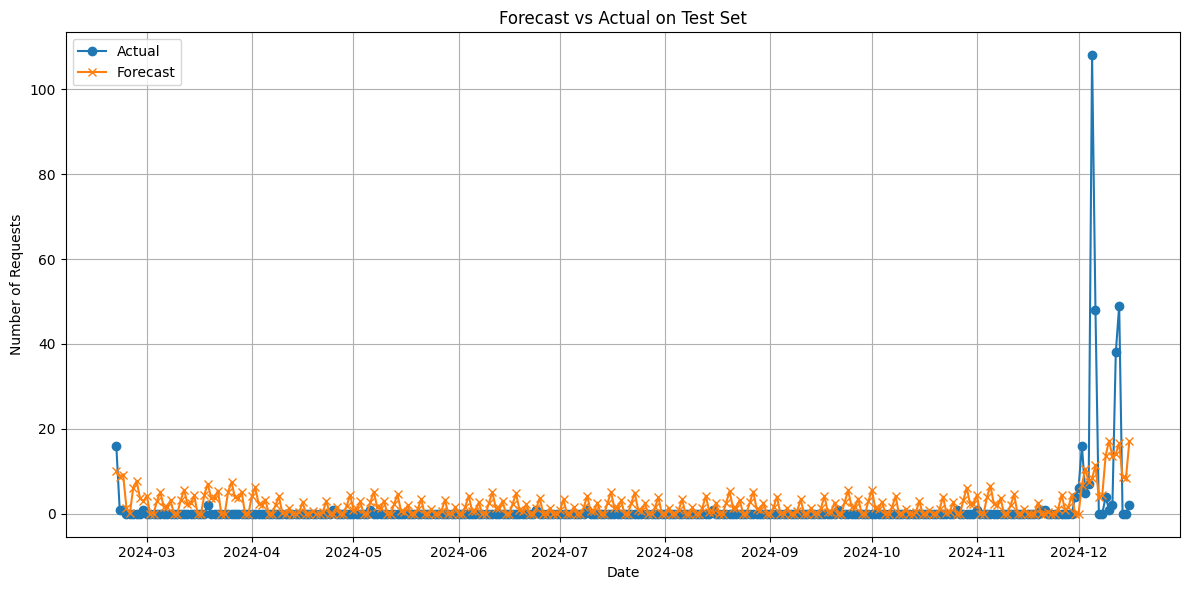

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], forecast.iloc[-300:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
from prophet import Prophet

model_prophet_full = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet_full.add_country_holidays(country_name='US')
model_prophet_full.fit(df_prophet)

future = model_prophet_full.make_future_dataframe(periods=500, freq='D')
forecast = model_prophet_full.predict(future)

# 预测值 vs 实际值

forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-500:]['yhat'].values
y_true = test_df['y'].values

07:39:48 - cmdstanpy - INFO - Chain [1] start processing
07:39:52 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
import pandas as pd

# 创建一个以 test_df 最后一个日期为起点、向后推 500 个日期的时间序列
if isinstance(ts.index, pd.DatetimeIndex):
    start_date = ts.index[-1] + pd.Timedelta(days=1)
else:
    start_date = pd.to_datetime(ts['ds'].iloc[-1]) + pd.Timedelta(days=1)

future_dates = pd.date_range(start=start_date, periods=500, freq='D')

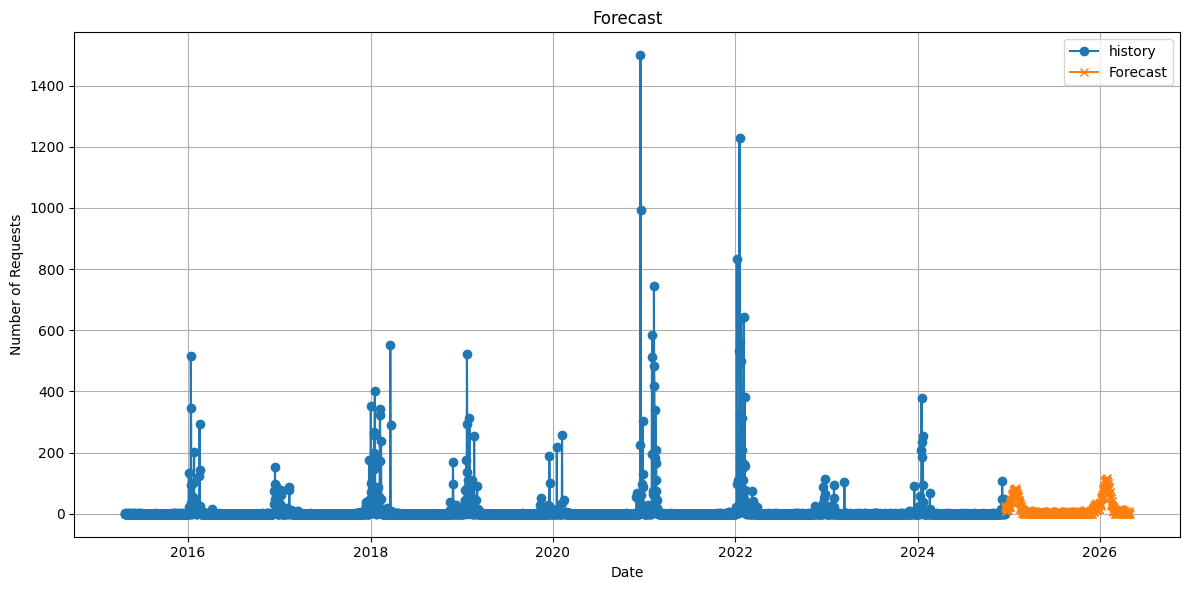

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='history', marker='o')
plt.plot(future_dates, forecast.iloc[-500:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Step 1: 准备 ts_monthly
df_prophet_monthly = ts_monthly.reset_index()
df_prophet_monthly.columns = ['ds', 'y']

# Step 2: Prophet 模型
from prophet import Prophet
train_df = df_prophet_monthly.iloc[:-30]
test_df = df_prophet_monthly.iloc[-30:]

model_prophet_monthly = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet_monthly.add_country_holidays(country_name='US')
model_prophet_monthly.fit(train_df)

future = model_prophet_monthly.make_future_dataframe(periods=30, freq='M')
forecast = model_prophet_monthly.predict(future)

# 预测值 vs 实际值

forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-30:]['yhat'].values
y_true = test_df['y'].values

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")

07:40:16 - cmdstanpy - INFO - Chain [1] start processing
07:40:18 - cmdstanpy - INFO - Chain [1] done processing
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


RMSE: 786.17, MAE: 616.58, MAPE: inf%


D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LvFeinong\AppData\Local\Temp\ipykernel_24892\1945131677.py:33: RuntimeWarning: divide by zero encountered in divide
  mape = (abs((y_true - y_pred) / y_true).mean()) * 100


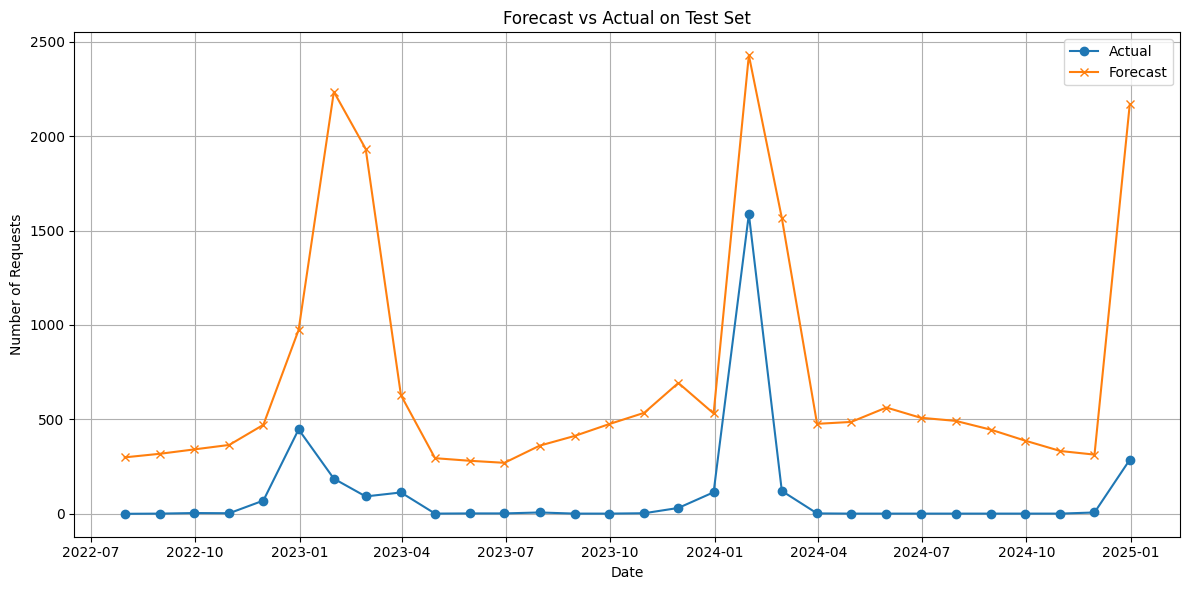

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], forecast.iloc[-30:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
# Step 1: 准备 ts_monthly
df_prophet_monthly = ts_monthly.reset_index()
df_prophet_monthly.columns = ['ds', 'y']

# Step 2: Prophet 模型
from prophet import Prophet

model_prophet = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet.fit(df_prophet_monthly)

# Step 3: 预测未来 6 个月
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

# Step 4: 可视化
# model_prophet.plot(forecast)


07:40:45 - cmdstanpy - INFO - Chain [1] start processing
07:40:45 - cmdstanpy - INFO - Chain [1] done processing
D:\ProgramData\Anaconda3\envs\MLfoundation\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [79]:
import pandas as pd

# 创建一个以 test_df 最后一个日期为起点、向后推 500 个日期的时间序列
if isinstance(ts_monthly.index, pd.DatetimeIndex):
    start_date = ts.index[-1] + pd.Timedelta(days=1)
else:
    start_date = pd.to_datetime(ts['ds'].iloc[-1]) + pd.Timedelta(months=1)

future_dates = pd.date_range(start=start_date, periods=12, freq='ME')
future_dates

DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')

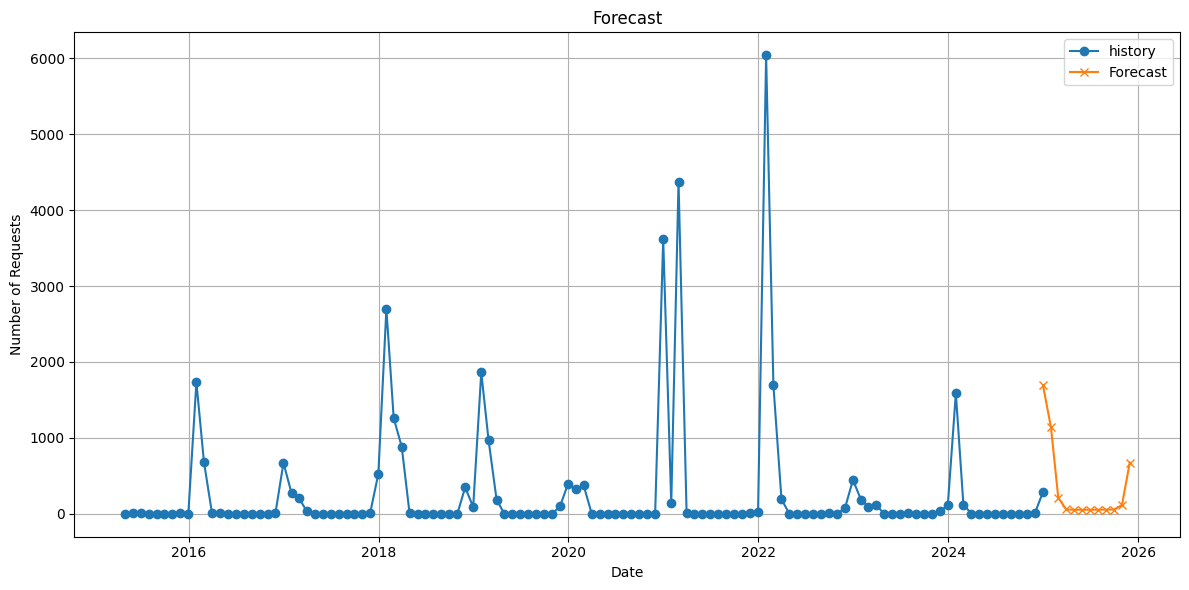

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(ts_monthly.index, ts_monthly, label='history', marker='o')
plt.plot(future_dates, forecast.iloc[-12:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()